

#**Head Pose Estimation Using Landmarks** 



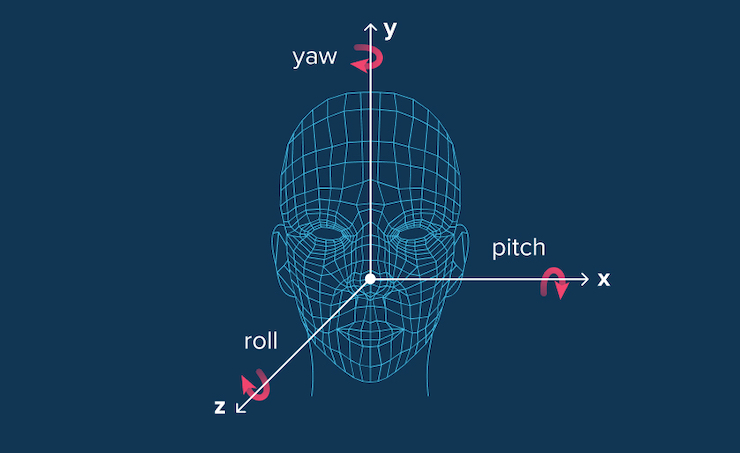

#**The technology is needed for facial recognition, eye gaze estimation and emotion recognition. For instance, it can be used for safety monitoring on the road, where we need to understand whether a driver pays attention to the road or not. Finally, It could also be used in computer graphics and VR applications to render a specific scene correctly.**


***The main objective of this task is to find the relative orientation (and position) of the human’s head with respect to the camera. In particular, in the head pose estimation task, it is common to predict relative orientation with Euler angles – yaw, pitch and roll. They define the object’s rotation in a 3D environment.***




* **We will use AFLW2000 dataset with contains 2000 image and 2000 matlab file with contains the 3 labels (angels).**

*   ***We will use MediaPipe library in both training and testing phases.***

**In Training:** first we dtect the face of each image then using the same library to generate the landmark points of the face after this phase the training data (features) will contain 1853 samples with 936 columns (468 for X and 468 for Y), for labels we will extract the 3 angels from the mat file.


**In Testing:** we will use the MediaPipe Library to generate the landmarks as we did in the training phase and using the trained models to predict the 3 labels and using them to draw the axis.

For more information check this link: [Head Pose Estimation with Computer Vision](https://indatalabs.com/blog/head-pose-estimation-with-cv)


### Installing MediaPipe

In [1]:
%%capture
!pip install mediapipe

### Required Libraries

In [2]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

### Downloading the data

In [ ]:
# link of the data to download it on your PC to check it before working :) 
# http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [3]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

### Preparing the data

In [4]:
import glob

In [5]:
print('Check the data:')
path_of_pics= []
for pics in glob.glob('/content/AFLW2000/*.mat'):
    print(pics)
    path_of_pics.append(pics)

Check the data:
/content/AFLW2000/image00168.mat
/content/AFLW2000/image04248.mat
/content/AFLW2000/image01340.mat
/content/AFLW2000/image00804.mat
/content/AFLW2000/image02536.mat
/content/AFLW2000/image00759.mat
/content/AFLW2000/image00022.mat
/content/AFLW2000/image00312.mat
/content/AFLW2000/image00338.mat
/content/AFLW2000/image03123.mat
/content/AFLW2000/image00847.mat
/content/AFLW2000/image03283.mat
/content/AFLW2000/image02747.mat
/content/AFLW2000/image04344.mat
/content/AFLW2000/image03930.mat
/content/AFLW2000/image04168.mat
/content/AFLW2000/image02724.mat
/content/AFLW2000/image01471.mat
/content/AFLW2000/image00188.mat
/content/AFLW2000/image01149.mat
/content/AFLW2000/image00645.mat
/content/AFLW2000/image00002.mat
/content/AFLW2000/image00199.mat
/content/AFLW2000/image04232.mat
/content/AFLW2000/image00182.mat
/content/AFLW2000/image03893.mat
/content/AFLW2000/image03794.mat
/content/AFLW2000/image02494.mat
/content/AFLW2000/image04130.mat
/content/AFLW2000/image0094

In [6]:
print(len(path_of_pics))

2000


**Here we have points of data on the X_axis and Y_axis then we need both of them to make it our features**

**Pitch , Yaw , Roll are our labels**

In [7]:

X_data= []
Y_data= []
labels= []
files= []


#to extract the 2000 pics
path_of_pics= []
for pics in glob.glob('/content/AFLW2000/*.mat'):
    path_of_pics.append(pics)

#to extract the points in the face
faceModule = mediapipe.solutions.face_mesh
#looping on all the images and load the .mat file for each one
for pics in path_of_pics:
  with faceModule.FaceMesh(static_image_mode=True, max_num_faces=2) as faces:
    # loading the image in .jpg
    image = cv2.imread(pics[:-4]+'.jpg')
    # processing the pics to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #Here to detect only 1 face to simplify the code 
    if results.multi_face_landmarks:
      #to append all the pics we load in the files list 
      files.append(pics)
      #Let's detect the faces ;) for  1 face / image 
      face= results.multi_face_landmarks[0]
      ##let's define 2 lists to put the data of the face in both X and Y axises 
      x_data=[]
      y_data=[]
      # looping over the 468 points in the x and y axises 
      for landmark in face.landmark:
        x= landmark.x
        y= landmark.y
        # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
        shape = image.shape 
        relative_x = int(x * shape[1])
        relative_y = int(y * shape[0])
        #now we put the features in the X & Y we have 
        x_data.append(relative_x)
        y_data.append(relative_y)

      #convert the lists to numpy array
      x_data= np.array(x_data)
      y_data= np.array(y_data)
      #adding this to the main list of X & Y data
      X_data.append(x_data)
      Y_data.append(y_data)

      # loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
      mat_file = sio.loadmat(pics)
      # extracting the labels 3 angels
      pose_para = mat_file["Pose_Para"][0][:3]
      #add this to the labels list 
      labels.append(pose_para)
      

#convert the main lists  to numpy array 
X_data= np.array(X_data)
Y_data= np.array(Y_data)
labels= np.array(labels)

#extract the first label 'pitch'
pitch_label= labels[:,0]
#extract the second label 'yaw'
yaw_label= labels[:,1]
#extract the third label 'roll'
roll_label= labels[:,2]


print("___________________")       

print(X_data.shape)
print(Y_data.shape)
print(labels.shape)

___________________
(1858, 468)
(1858, 468)
(1858, 3)


In [8]:
X_data[0]

array([237, 248, 239, 239, 250, 248, 241, 174, 240, 242, 242, 236, 234,
       232, 233, 233, 233, 232, 227, 245, 235, 130, 199, 191, 183, 170,
       206, 190, 199, 181, 174, 162, 194, 170, 126, 151, 194, 227, 225,
       215, 206, 217, 209, 190, 242, 242, 162, 211, 216, 214, 165, 241,
       189, 175, 147, 224, 206, 184, 118, 221, 227, 193, 196, 169, 213,
       206, 205, 194, 159, 201, 155, 143, 227, 216, 208, 222, 195, 200,
       197, 229, 209, 216, 224, 217, 222, 224, 224, 225, 208, 207, 206,
       204, 200, 111, 242, 203, 201, 229, 214, 228, 202, 188, 211, 168,
       178, 186, 197, 224, 222, 218, 174, 151, 210, 163, 218, 224, 139,
       159, 172, 189, 201, 209, 233, 139, 155, 242, 213, 113, 216, 208,
       167, 222, 112, 209, 232, 150, 144, 121, 136, 134, 191, 239, 204,
       141, 184, 192, 197, 137, 203, 175, 161, 243, 218, 198, 204, 208,
       147, 203, 196, 189, 182, 177, 120, 179, 238, 209, 222, 227, 239,
       164, 177, 206, 129, 208, 228, 222, 189, 122, 216, 215, 21

# Preprocessing of data
to know the dimensions of the center, min and max of the face points. for morre details check [Face Mesh landmark](https://i.stack.imgur.com/5Mohl.jpg) 

In [9]:
#Center at [0,0]
Center_of_X= X_data - X_data[0,0].reshape(-1,1)
Center_of_X

array([[  0,  11,   2, ...,   8,  38,  41],
       [ -6,   0,  -3, ...,  16,  78,  85],
       [ -4,   4,  -2, ...,   3,  38,  41],
       ...,
       [ 19,   5,   8, ..., -17,  20,  22],
       [-11, -13, -12, ...,   4,  61,  65],
       [ 10,  18,   8, ...,   5,  28,  31]])

In [10]:
Center_of_X.shape

(1858, 468)

In [11]:
Center_of_Y= Y_data - Y_data[0,0].reshape(-1,1)
Center_of_Y

array([[   0,  -23,  -17, ...,  -68,  -75,  -77],
       [   6,  -33,  -21, ...,  -83,  -87,  -90],
       [   4,  -17,  -12, ...,  -69,  -85,  -88],
       ...,
       [   9,  -16,   -9, ...,  -76, -114, -120],
       [  16,  -15,   -8, ...,  -79,  -92,  -96],
       [   2,  -27,  -18, ...,  -69,  -76,  -80]])

# normalize the data of X & Y 

In [12]:
#min = 10
#max = 152 
min_of_X= X_data[:,10]
min_of_X

array([242, 235, 227, ..., 158, 222, 232])

In [13]:
X_data[:,10]

array([242, 235, 227, ..., 158, 222, 232])

In [14]:
min_of_Y= Y_data[:,10]
min_of_Y

array([159, 134, 151, ..., 155, 127, 160])

In [15]:
max_of_X= X_data[:,152]
max_of_X

array([218, 222, 223, ..., 292, 229, 229])

In [16]:
max_of_Y= Y_data[:,152]
max_of_Y

array([352, 403, 352, ..., 369, 378, 364])

In [17]:
# computing the distance
distance = np.linalg.norm(np.array((min_of_X,min_of_Y)) - np.array((max_of_X,max_of_Y)),axis = 0).reshape(-1,1)
Norm_X = Center_of_X / distance
Norm_Y = Center_of_Y / distance
print(Norm_X.shape)
print(Norm_Y.shape)

(1858, 468)
(1858, 468)


In [18]:
distance

array([[194.48650339],
       [269.3139432 ],
       [201.03979706],
       ...,
       [252.49158402],
       [251.09759059],
       [204.02205763]])

In [19]:
Norm_X

array([[ 0.        ,  0.05655919,  0.01028349, ...,  0.04113396,
         0.19538631,  0.21081154],
       [-0.02227883,  0.        , -0.01113942, ...,  0.05941022,
         0.28962481,  0.31561678],
       [-0.01989656,  0.01989656, -0.00994828, ...,  0.01492242,
         0.1890173 ,  0.20393972],
       ...,
       [ 0.07525003,  0.01980264,  0.03168422, ..., -0.06732898,
         0.07921056,  0.08713162],
       [-0.04380767, -0.0517727 , -0.04779018, ...,  0.01593006,
         0.24293343,  0.2588635 ],
       [ 0.04901431,  0.08822575,  0.03921145, ...,  0.02450715,
         0.13724006,  0.15194436]])

In [20]:
Norm_Y

array([[ 0.        , -0.11826013, -0.08740966, ..., -0.34963866,
        -0.38563087, -0.39591436],
       [ 0.02227883, -0.12253357, -0.07797591, ..., -0.3081905 ,
        -0.32304306, -0.33418247],
       [ 0.01989656, -0.08456037, -0.05968967, ..., -0.34321563,
        -0.42280186, -0.43772428],
       ...,
       [ 0.03564475, -0.06336845, -0.03564475, ..., -0.30100013,
        -0.4515002 , -0.47526337],
       [ 0.06372025, -0.05973773, -0.03186012, ..., -0.31461871,
        -0.36639141, -0.38232147],
       [ 0.00980286, -0.13233863, -0.08822575, ..., -0.33819873,
        -0.37250874, -0.39211447]])

In [21]:
# concatinating the X & Y data to form our features
features = np.hstack([Norm_X,Norm_Y])
print(features.shape)

(1858, 936)


In [22]:
features

array([[ 0.        ,  0.05655919,  0.01028349, ..., -0.34963866,
        -0.38563087, -0.39591436],
       [-0.02227883,  0.        , -0.01113942, ..., -0.3081905 ,
        -0.32304306, -0.33418247],
       [-0.01989656,  0.01989656, -0.00994828, ..., -0.34321563,
        -0.42280186, -0.43772428],
       ...,
       [ 0.07525003,  0.01980264,  0.03168422, ..., -0.30100013,
        -0.4515002 , -0.47526337],
       [-0.04380767, -0.0517727 , -0.04779018, ..., -0.31461871,
        -0.36639141, -0.38232147],
       [ 0.04901431,  0.08822575,  0.03921145, ..., -0.33819873,
        -0.37250874, -0.39211447]])

# Dimensionality reduction on features

In [23]:
from sklearn.decomposition import PCA
pca= PCA(n_components=167)
new_features= pca.fit_transform(features)
new_features.shape

(1858, 167)

In [24]:
features.shape

(1858, 936)

In [25]:
new_features

array([[ 5.51714758e-02, -3.79131101e-01,  1.10900560e+00, ...,
        -1.30209535e-04,  1.86593055e-03, -3.71295928e-06],
       [-6.48736107e-01, -5.10924173e-01, -4.32061343e-01, ...,
        -1.80391986e-04, -6.44713716e-04,  3.58286064e-04],
       [ 2.23423642e-01,  3.44411552e-01,  6.19844557e-01, ...,
         9.09837353e-04, -6.87149555e-04, -3.66516349e-04],
       ...,
       [-1.23121615e+00,  3.43285033e+00, -6.38572121e-01, ...,
         1.21318203e-04,  2.08029382e-04,  1.16803928e-03],
       [-3.32885131e-01, -4.85412038e-03, -5.91747022e-01, ...,
        -8.49405684e-04, -2.87606147e-03,  9.15674651e-04],
       [-4.55912666e-01,  3.02246373e-01,  8.95245562e-01, ...,
        -7.53978743e-04,  4.59745226e-03, -1.20653665e-03]])

# Applying Cross Validation
to see which model accuracy is more realistic 

In [26]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR


In [27]:
#xgboost model
pitch_XG_trial= XGBRegressor(verbosity=0)
yaw_XG_trial= XGBRegressor(verbosity=0)
roll_XG_trial= XGBRegressor(verbosity=0)

pitch_model_crossvalid= cross_val_score(pitch_XG_trial, new_features, pitch_label, scoring="neg_mean_absolute_error")
yaw_model_crossvalid= cross_val_score(yaw_XG_trial, new_features, yaw_label, scoring="neg_mean_absolute_error")
roll_model_crossvalid= cross_val_score(roll_XG_trial, new_features, roll_label, scoring="neg_mean_absolute_error")
print("Cross val on pitch", pitch_model_crossvalid)
print("===========")
print("Cross val on yaw", yaw_model_crossvalid)
print("============")
print("Cross val on roll", roll_model_crossvalid)

#calculate the mean
print("pitch cross val mean", pitch_model_crossvalid.mean())
print("===========")
print("yaw cross val mean", yaw_model_crossvalid.mean())
print("===========")
print("roll cross val mean", roll_model_crossvalid.mean())

Cross val on pitch [-0.13077724 -0.14055051 -0.11109014 -0.1276352  -0.11651526]
Cross val on yaw [-0.10208203 -0.08734484 -0.08810664 -0.08322171 -0.08513534]
Cross val on roll [-0.10918616 -0.10453204 -0.07872891 -0.0790957  -0.07710076]
pitch cross val mean -0.12531367164197804
yaw cross val mean -0.08917811328636807
roll cross val mean -0.08972871463541267


In [28]:
#SVR model
pitch_SVR_trial= SVR()
yaw_SVR_trial= SVR()
roll_SVR_trial= SVR()

pitch_model_crossvalid= cross_val_score(pitch_SVR_trial, new_features, pitch_label,scoring="neg_mean_absolute_error")
yaw_model_crossvalid= cross_val_score(yaw_SVR_trial, new_features, yaw_label, scoring="neg_mean_absolute_error")
roll_model_crossvalid= cross_val_score(roll_SVR_trial, new_features, roll_label, scoring="neg_mean_absolute_error")
print("Cross val on pitch", pitch_model_crossvalid)
print("===========")
print("Cross val on yaw", yaw_model_crossvalid)
print("============")
print("Cross val on roll", roll_model_crossvalid)

#calculate the mean
print("pitch cross val mean", pitch_model_crossvalid.mean())
print("===========")
print("yaw cross val mean", yaw_model_crossvalid.mean())
print("===========")
print("roll cross val mean", roll_model_crossvalid.mean())

Cross val on pitch [-0.11581206 -0.13575127 -0.09304889 -0.08668768 -0.09599798]
Cross val on yaw [-0.09035304 -0.07435457 -0.07650901 -0.0808016  -0.07107751]
Cross val on roll [-0.10542471 -0.1065435  -0.0704422  -0.06066934 -0.07422703]
pitch cross val mean -0.10545957515596265
yaw cross val mean -0.07861914580894502
roll cross val mean -0.08346135699053145


#Split the data to training and validation

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val, files_trian, files_test  = train_test_split(new_features, labels, files ,test_size= 0.2, random_state= 42)

y_train_pitch= Y_train[:,0]
y_train_yaw= Y_train[:,1]
y_train_roll= Y_train[:,2]

y_val_pitch= Y_val[:,0]
y_val_yaw= Y_val[:,1]
y_val_roll= Y_val[:,2]

# Building the model 

# Using gridsearch for SVR model

In [30]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [31]:
#for pitch 
svr_parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[1,5,10,100]}
svr= SVR()
svr_on_pitch = GridSearchCV(estimator = svr,param_grid = svr_parameters)
svr_on_pitch.fit(X_train, y_train_pitch)
svr_pitch_model = svr_on_pitch.best_estimator_
print("Pitch Winner Model: ",svr_pitch_model)
print("Train Error: ",mean_absolute_error(svr_pitch_model.predict(X_train),y_train_pitch))
print("Validation Error: ",mean_absolute_error(svr_pitch_model.predict(X_val),y_val_pitch))

Pitch Winner Model:  SVR(C=10, kernel='linear')
Train Error:  0.10736233957513325
Validation Error:  0.09805939173557074


In [32]:
#for yaw
svr = SVR()
svr_on_yaw = GridSearchCV(estimator = svr,param_grid = svr_parameters)
svr_on_yaw.fit(X_train, y_train_yaw)
svr_yaw_model = svr_on_yaw.best_estimator_
print("Yaw Winner Model: ",svr_yaw_model)
print("Train Error: ",mean_absolute_error(svr_yaw_model.predict(X_train),y_train_yaw))
print("Validation Error: ",mean_absolute_error(svr_yaw_model.predict(X_val),y_val_yaw))

Yaw Winner Model:  SVR(C=5, kernel='linear')
Train Error:  0.07568951524890223
Validation Error:  0.08019173346302029


In [33]:
#for roll
svr = SVR()
svr_on_roll = GridSearchCV(estimator = svr,param_grid = svr_parameters)
svr_on_roll.fit(X_train, y_train_roll)
svr_roll_model = svr_on_roll.best_estimator_
print("Yaw Winner Model: ",svr_roll_model)
print("Train Error: ",mean_absolute_error(svr_roll_model.predict(X_train),y_train_roll))
print("Validation Error: ",mean_absolute_error(svr_roll_model.predict(X_val),y_val_roll))

Yaw Winner Model:  SVR(C=100)
Train Error:  0.052495248503867935
Validation Error:  0.09956674785884535


# Usind XGBooost Regressor model

In [34]:
#for pitch
pitch_XG_model=  XGBRegressor(n_estimators=100, max_depth=3, eta=0.1,subsample=1, colsample_bytree=1).fit(X_train, y_train_pitch)
print("Trian error", mean_absolute_error(pitch_XG_model.predict(X_train), y_train_pitch))
print("validation error", mean_absolute_error(pitch_XG_model.predict(X_val), y_val_pitch))

[15:06:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Trian error 0.07062412732690956
validation error 0.13801308533443407


In [35]:
#for yaw
yaw_XG_model= XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, seed=42).fit(X_train, y_train_yaw)
print("Trian error", mean_absolute_error(yaw_XG_model.predict(X_train), y_train_yaw))
print("validation error", mean_absolute_error(yaw_XG_model.predict(X_val), y_val_yaw))

[15:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Trian error 0.03024684580673539
validation error 0.0866436001006639


In [36]:
#for roll
roll_XG_model= XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, seed=42).fit(X_train, y_train_roll)
print("Trian error", mean_absolute_error(roll_XG_model.predict(X_train), y_train_roll))
print("validation error", mean_absolute_error(roll_XG_model.predict(X_val), y_val_roll))

[15:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Trian error 0.03322164836978531
validation error 0.09332334919644802


# Define the 3_axis to draw the image

In [37]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

# Let's choose random image to draw the points and axis 


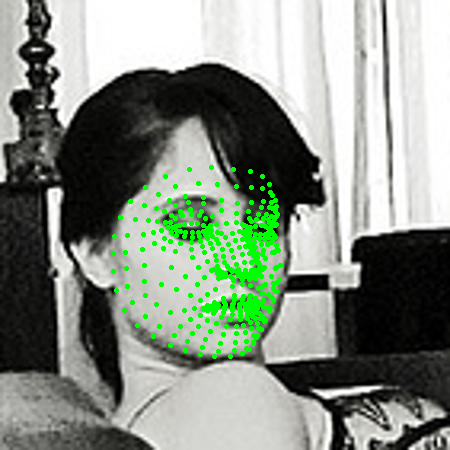

In [38]:
# choosing random image
random_image = random.choice(files_test)

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread(random_image[:-4] + '.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the images
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      cv2_imshow(image)

# Now let's draw the axis from the true labels of the image

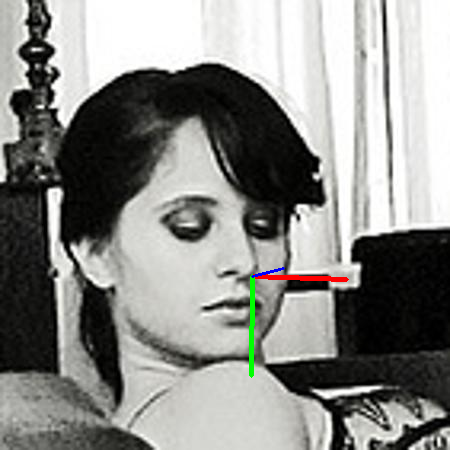

In [39]:
# reading the image
frame = cv2.imread(random_image[:-4] + '.jpg')
# reading the true labels and drawing the axis on the image
mat = sio.loadmat(random_image)
pitch_true = mat["Pose_Para"][0][0]
yaw_true = mat["Pose_Para"][0][1]
roll_true = mat["Pose_Para"][0][2]
cv2_imshow(draw_axis(frame,pitch_true,yaw_true,roll_true,x_data[19],y_data[19]))

# Testing the model using XGBoost 

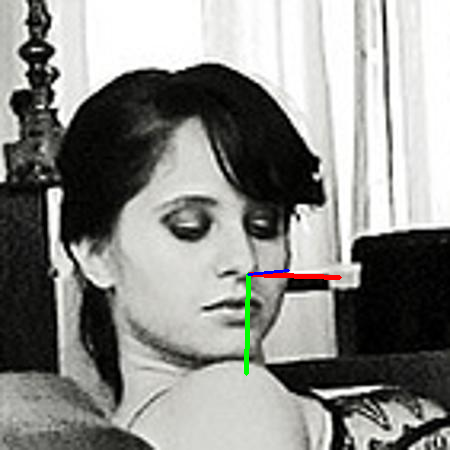

In [40]:
# choosing random image from the testing data
faceModule = mediapipe.solutions.face_mesh
with faceModule.FaceMesh(static_image_mode=True) as face:
  # reading the image
  frame = cv2.imread(random_image[:-4] + '.jpg')
  # processing the image to detect the face and then generating the land. marks (468 for each x,y,z).
  results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
  if results.multi_face_landmarks != None:
    for face in results.multi_face_landmarks:
        # initializing two lists to store x and y points
        X = []
        Y = []
        for j,landmark in enumerate(face.landmark):
            x = landmark.x
            y = landmark.y
            # getting the points back to its actual values
            shape = frame.shape 
            relative_x = int(x * shape[1])
            relative_y = int(y * shape[0])
            # appending the points to the X and Y lists
            X.append(relative_x)
            Y.append(relative_y)

        # converting the x and y points to numpy array
        X = np.array(X)
        Y = np.array(Y)

        # centering the points of x and y values arround the point 0
        X_center = X - X[0]
        Y_center = Y - Y[0]
        # computing the distance between the point 10 and 152
        d = np.linalg.norm(np.array((X[10],Y[10])) - np.array((X[152],Y[152])))
        # normalizing the points
        X_norm = X_center/d
        Y_norm = Y_center/d
        X_norm = X_norm
        Y_norm = Y_norm
        # concatinating the x and y points to predict the labels (pitch,yaw,roll)
        points = np.hstack([X_norm,Y_norm]).reshape(1,-1)
        new_points= pca.transform(points)
        # predicting the 3 angels to draw the axis on the image
        predict_pitch = pitch_XG_model.predict(new_points)
        predict_yaw = yaw_XG_model.predict(new_points)
        predict_roll = roll_XG_model.predict(new_points)
        cv2_imshow(draw_axis(frame,predict_pitch,predict_yaw,predict_roll,X[19],Y[19]))

# Testing the model using SVR

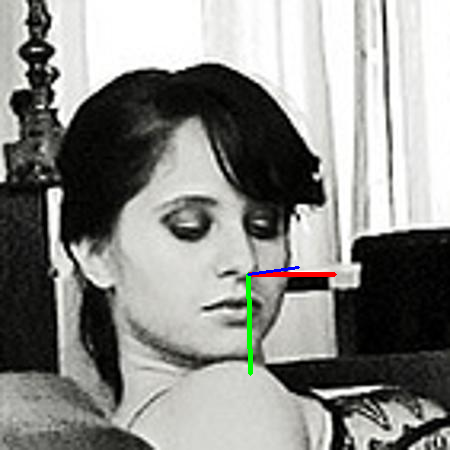

In [41]:
# choosing random image from the testing data
faceModule = mediapipe.solutions.face_mesh
with faceModule.FaceMesh(static_image_mode=True) as face:
  # reading the image
  frame = cv2.imread(random_image[:-4] + '.jpg')
  # processing the image to detect the face and then generating the land. marks (468 for each x,y,z).
  results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
  if results.multi_face_landmarks != None:
    for face in results.multi_face_landmarks:
        # initializing two lists to store x and y points
        X = []
        Y = []
        for j,landmark in enumerate(face.landmark):
            x = landmark.x
            y = landmark.y
            # getting the points back to its actual values
            shape = frame.shape 
            relative_x = int(x * shape[1])
            relative_y = int(y * shape[0])
            # appending the points to the X and Y lists
            X.append(relative_x)
            Y.append(relative_y)

        # converting the x and y points to numpy array
        X = np.array(X)
        Y = np.array(Y)

        # centering the points of x and y values arround the point 0
        X_center = X - X[0]
        Y_center = Y - Y[0]
        # computing the distance between the point 10 and 152
        d = np.linalg.norm(np.array((X[10],Y[10])) - np.array((X[152],Y[152])))
        # normalizing the points
        X_norm = X_center/d
        Y_norm = Y_center/d
        X_norm = X_norm
        Y_norm = Y_norm
        # concatinating the x and y points to predict the labels (pitch,yaw,roll)
        points = np.hstack([X_norm,Y_norm]).reshape(1,-1)
        new_points= pca.transform(points)
        # predicting the 3 angels to draw the axis on the image
        predict_pitch = svr_pitch_model.predict(new_points)
        predict_yaw = svr_yaw_model.predict(new_points)
        predict_roll = svr_roll_model.predict(new_points)
        cv2_imshow(draw_axis(frame,predict_pitch,predict_yaw,predict_roll,X[19],Y[19]))

# Testing the model on a video

In [42]:
#Vedio path
# loading the test video
%%capture
!git clone https://github.com/ToqaMuhammad6/Head-Pose-Esimation-Project

# But first let's smooth the output by Implementing Queue for storing the angles 

Here we will store the angels upto the maximum size we would define to get the average of them for smoothing the moving of the axis.

In [43]:
class Queue:
    # defining the constructor
    def __init__(self,max_size):
        self.queue = []
        self.length = 0
        self.max_size = max_size
    
    # adding values to the queue
    def enqueue(self,x):
        if self.length < self.max_size:
          self.queue.append(x)
          self.length = self.length+1
        else:
          print("You have reached the maximum size") 
    # removing values from the queue
    def dequeue(self):
        if len(self.queue) > 0:
            removed = self.queue[0]
            del self.queue[0]
            self.length = self.length-1
            return removed
        else:
            print("Queue is Empty")

    # checking if the queue is full
    def IsFull(self):
      if self.length == self.max_size:
        return True
    
    # printing the queue values
    def print_queue(self):
        for i in self.queue:
            print(i)

# Now let's processing the frames and draw the axis on them 

**I would like to thank my cousin Yassin for his help to let me taking a video for him to test the project 😆**

In [44]:
# Create a VideoCapture object and read from input file
def Create_TestVideo(pitch_model,yaw_model,roll_model,smoothing = False,size = 30):

  cap = cv2.VideoCapture('/content/Head-Pose-Esimation-Project/Test Video.mp4')
  width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

  # Check if camera opened successfully
  if (cap.isOpened()== False): 
      print("Error opening video file")

  
  pitch_queue = Queue(max_size = size)
  yaw_queue = Queue(max_size = size)
  roll_queue = Queue(max_size = size)

  # initializing a list to store the frames   
  img_array = []
  # Read until video is completed
  while(cap.isOpened()):   
    # Capture frame-by-frame
      ret, frame = cap.read()
      if ret == True:
        with faceModule.FaceMesh(static_image_mode=True) as face:
          # processing the image to detect the face and then generating the land marks (468 for each x,y,z).
          results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
          if results.multi_face_landmarks != None:
            for face in results.multi_face_landmarks:
                # initializing X and Y lists to store the spacial coordinates of the points
                X = []
                Y = []
                # looping over the landmarks to extract x and y
                for j,landmark in enumerate(face.landmark):
                    x = landmark.x
                    y = landmark.y
                    # retrieve the true values of x and y
                    shape = frame.shape 
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    X.append(relative_x)
                    Y.append(relative_y)

                X = np.array(X)
                Y = np.array(Y)
                # centering the data arround the point 0
                X_center = X - X[0]
                Y_center = Y - Y[0]
                d = np.linalg.norm(np.array((X[10],Y[10])) - np.array((X[152],Y[152])))
                X_norm = X_center/d
                Y_norm = Y_center/d
                X_norm = X_norm
                Y_norm = Y_norm
                points = np.hstack([X_norm,Y_norm]).reshape(1,-1)
                new_points= pca.transform(points)
                # predicting the 3 angels to draw the axis on the image
                pred_pitch = pitch_model.predict(new_points)
                pred_yaw = yaw_model.predict(new_points)
                pred_roll = roll_model.predict(new_points)
                
                if smoothing  == True:
                  if not pitch_queue.IsFull(): 
                    pitch_queue.enqueue(pred_pitch)
                    yaw_queue.enqueue(pred_yaw)
                    roll_queue.enqueue(pred_roll)
                  else:
                    pitch_queue.dequeue()
                    yaw_queue.dequeue()
                    roll_queue.dequeue()
                    pitch_queue.enqueue(pred_pitch)
                    yaw_queue.enqueue(pred_yaw)
                    roll_queue.enqueue(pred_roll)

                  pitch = sum(pitch_queue.queue)/len(pitch_queue.queue)
                  yaw = sum(yaw_queue.queue)/len(yaw_queue.queue)
                  roll = sum(roll_queue.queue)/len(roll_queue.queue)
                  draw_axis(frame,pitch,yaw,roll,X[19],Y[19])

                else:
                  draw_axis(frame,pred_pitch,pred_yaw,pred_roll,X[19],Y[19])
                # appending the result frame to the img_array list
                img_array.append(frame)
      # Break the loop
      else: 
          break
  cap.release()  
  # Closes all the frames
  cv2.destroyAllWindows()
  print("Number of Detected Frames = ",len(img_array))
  # converting the frames to video
  out = cv2.VideoWriter('output video by SVR.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
  for i in range(len(img_array)):
    out.write(img_array[i])
  out.release()

## Let's try on the SVR model 

In [45]:
Create_TestVideo(svr_pitch_model,svr_yaw_model,svr_roll_model,smoothing = True,size = 3)

Number of Detected Frames =  619


In [46]:
from google.colab import files
files.download('/content/output video by SVR.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now let's try on XGBoost model

In [47]:
# Create a VideoCapture object and read from input file
def Create_TestVideo(pitch_model,yaw_model,roll_model,smoothing = False,size = 30):

  cap = cv2.VideoCapture('/content/Head-Pose-Esimation-Project/Test Video.mp4')
  width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

  # Check if camera opened successfully
  if (cap.isOpened()== False): 
      print("Error opening video file")

  
  pitch_queue = Queue(max_size = size)
  yaw_queue = Queue(max_size = size)
  roll_queue = Queue(max_size = size)

  # initializing a list to store the frames   
  img_array = []
  # Read until video is completed
  while(cap.isOpened()):   
    # Capture frame-by-frame
      ret, frame = cap.read()
      if ret == True:
        with faceModule.FaceMesh(static_image_mode=True) as face:
          # processing the image to detect the face and then generating the land marks (468 for each x,y,z).
          results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
          if results.multi_face_landmarks != None:
            for face in results.multi_face_landmarks:
                # initializing X and Y lists to store the spacial coordinates of the points
                X = []
                Y = []
                # looping over the landmarks to extract x and y
                for j,landmark in enumerate(face.landmark):
                    x = landmark.x
                    y = landmark.y
                    # retrieve the true values of x and y
                    shape = frame.shape 
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    X.append(relative_x)
                    Y.append(relative_y)

                X = np.array(X)
                Y = np.array(Y)
                # centering the data arround the point 0
                X_center = X - X[0]
                Y_center = Y - Y[0]
                d = np.linalg.norm(np.array((X[10],Y[10])) - np.array((X[152],Y[152])))
                X_norm = X_center/d
                Y_norm = Y_center/d
                X_norm = X_norm
                Y_norm = Y_norm
                points = np.hstack([X_norm,Y_norm]).reshape(1,-1)
                new_points= pca.transform(points)
                # predicting the 3 angels to draw the axis on the image
                pred_pitch = pitch_model.predict(new_points)
                pred_yaw = yaw_model.predict(new_points)
                pred_roll = roll_model.predict(new_points)
                
                if smoothing  == True:
                  if not pitch_queue.IsFull(): 
                    pitch_queue.enqueue(pred_pitch)
                    yaw_queue.enqueue(pred_yaw)
                    roll_queue.enqueue(pred_roll)
                  else:
                    pitch_queue.dequeue()
                    yaw_queue.dequeue()
                    roll_queue.dequeue()
                    pitch_queue.enqueue(pred_pitch)
                    yaw_queue.enqueue(pred_yaw)
                    roll_queue.enqueue(pred_roll)

                  pitch = sum(pitch_queue.queue)/len(pitch_queue.queue)
                  yaw = sum(yaw_queue.queue)/len(yaw_queue.queue)
                  roll = sum(roll_queue.queue)/len(roll_queue.queue)
                  draw_axis(frame,pitch,yaw,roll,X[19],Y[19])

                else:
                  draw_axis(frame,pred_pitch,pred_yaw,pred_roll,X[19],Y[19])
                # appending the result frame to the img_array list
                img_array.append(frame)
      # Break the loop
      else: 
          break
  cap.release()  
  # Closes all the frames
  cv2.destroyAllWindows()
  print("Number of Detected Frames = ",len(img_array))
  # converting the frames to video
  out_XG = cv2.VideoWriter('output video by XGboost.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
  for i in range(len(img_array)):
    out_XG.write(img_array[i])
  out_XG.release()

In [48]:
Create_TestVideo(pitch_XG_model,yaw_XG_model,roll_XG_model,smoothing = True,size = 3)

Number of Detected Frames =  619


In [49]:
from google.colab import files
files.download('/content/output video by XGboost.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Tadaa 🎆 🥰 It was a long code I know xD  
#Hope you enjoyed and learned something new.
Thank you! 